In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.special as sci
from scipy.integrate import quad


In [57]:
a_ik = [-0.999985,-0.7369246,0.511210,-0.0826998,0.0655341,-0.562082,-0.905911,0.357729,0.358593,0.869386,-0.232996,0.0388327,0.661931,-0.930856,-0.893077,-0.0594001]





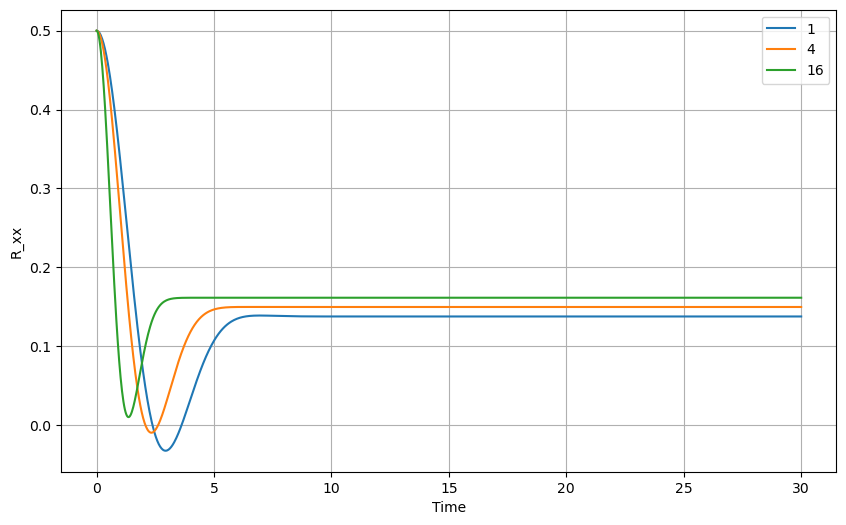

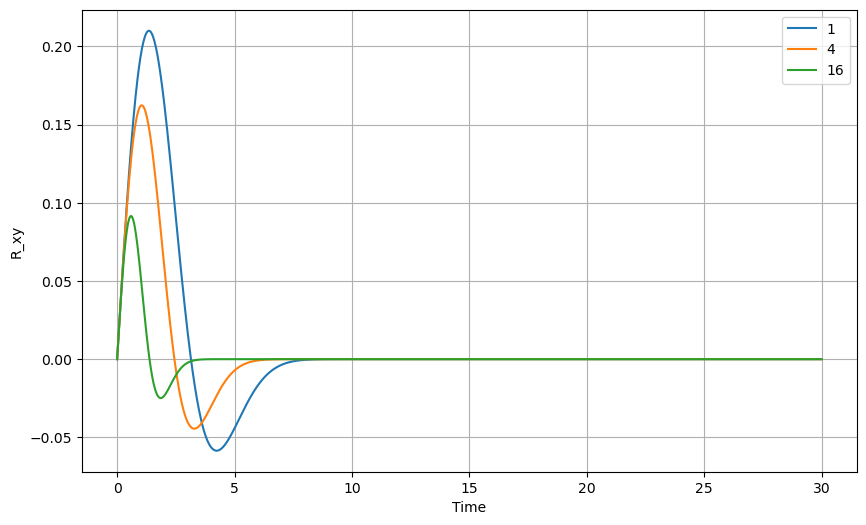

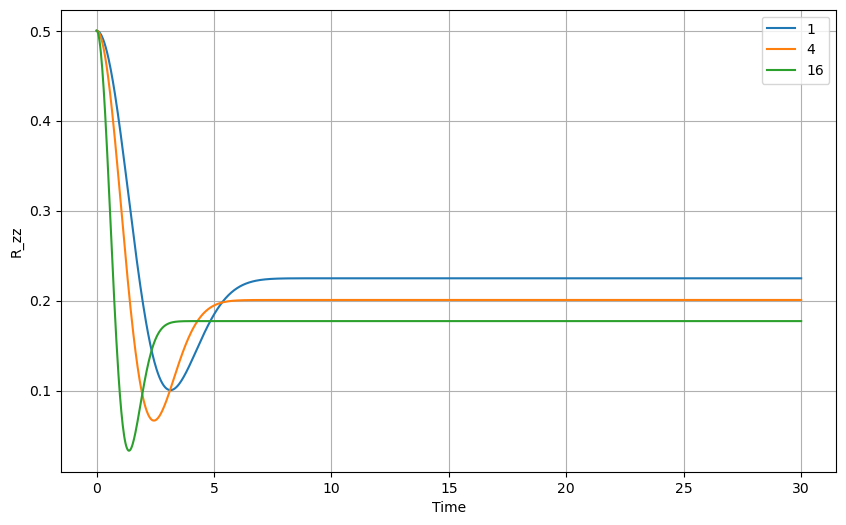

In [133]:
class Schulten_wolynes:


    def __init__(self,applied_magnetic_field_strength,gyromagnetic_ratio,nuclei_number,total_time,time_steps,a_ik):
          self.applied_magnetic_field_strength = applied_magnetic_field_strength
          self.gyromagnetic_ratio = gyromagnetic_ratio
          self.nuclei_number = nuclei_number
          self.total_time = total_time
          self.time_steps = time_steps
          self.a_ik = a_ik


    def calculate_electron_tensor(self,tensor): 
         electron_spin_correlation_tensor = []
         t_star_array = []
         func_w_star_t_star_array = []
         tau = self.__calculate_tau__()
         w_star = self.__calculate_w_star__(tau)
         time_increment = self.total_time / self.time_steps
         
         for i in range(self.time_steps):
              
                current_time = i * time_increment
                t_star = current_time / tau
                func_w_star_t_star = self.__calculate_func_numerically__(t_star,w_star)
              
                tensor_function = getattr(self, tensor)
            
                t_star_array.append(t_star)
                func_w_star_t_star_array.append(func_w_star_t_star)
                electron_spin_correlation_tensor.append(tensor_function(w_star, t_star, func_w_star_t_star))
         
         
         
         return np.real(electron_spin_correlation_tensor)
        
    
    def __integrand__(self,s, w):
        return np.exp(-s**2) * np.sin(w * s)
         
    def __calculate_func_numerically__(self,t_star,w_star):
         func_w_star_t_star_value, error = quad(self.__integrand__, 0 ,t_star, args=(w_star))
         return func_w_star_t_star_value 


    def __calculate_tau__(self):
        a_ik_square = np.square(self.a_ik[0:self.nuclei_number]) # squaring array elements
        sum_a_ik_square = np.sum(a_ik_square) # summing up to nuclei number array elements
        nuclear_constant = 0.5*(0.5 + 1)
        tau_squared = 6 / (sum_a_ik_square*nuclear_constant)
        tau = np.sqrt(tau_squared)
        return  tau


    def __calculate_w_star__(self,tau):
        w_i = -self.gyromagnetic_ratio*self.applied_magnetic_field_strength # Looking at w_i as norm calculation
        w_star = w_i * tau
        return  abs(w_star)
              
    def __R_xx__(self, w_star, t_star, func_w_star_t_star):
        exp_term = np.exp(-t_star ** 2)
        cos_term = np.cos(w_star * t_star)
        sin_term = np.sin(w_star * t_star)
        return (w_star * (2 + np.exp(-t_star**2) * ((w_star**2 - 2) * np.cos(w_star * t_star) - 2 * w_star * t_star * np.sin(w_star * t_star))) - 4 * func_w_star_t_star) / (2 * w_star**3)
        

    def __R_xy__(self,w_star,t_star, func_w_star_t_star):
        exp_term = np.exp(-t_star**2)
        cos_term = np.cos(w_star * t_star)
        sin_term = np.sin(w_star * t_star)
        return exp_term*(2*w_star*t_star*cos_term + (w_star**2 -2)*sin_term) / (2* w_star**2)


    def __R_zz__(self, w_star, t_star, func_w_star_t_star):
        exp_term = np.exp(-t_star ** 2)
        cos_term = np.cos(w_star * t_star)
        sin_term = np.sin(w_star * t_star)
        return (w_star * ((w_star** 2 ) + (4 * exp_term * cos_term) -4) + ( 8 * func_w_star_t_star)) / (2 * (w_star ** 3))
    
       



    



test = Schulten_wolynes(0.5,-1.001,1,30,1000,a_ik) # Use 0.001 for zero magnetic field play around with reducing it further 

R_xx_1 = test.calculate_electron_tensor('__R_xx__')
R_xy_1 = test.calculate_electron_tensor('__R_xy__')
R_zz_1 = test.calculate_electron_tensor('__R_zz__')

test = Schulten_wolynes(0.5,-1.001,4,30,1000,a_ik)

R_xx_4 = test.calculate_electron_tensor('__R_xx__')
R_xy_4 = test.calculate_electron_tensor('__R_xy__')
R_zz_4 = test.calculate_electron_tensor('__R_zz__')

test = Schulten_wolynes(0.5,-1.001,16,30,1000,a_ik)

R_xx_16 = test.calculate_electron_tensor('__R_xx__')
R_xy_16 = test.calculate_electron_tensor('__R_xy__')
R_zz_16 = test.calculate_electron_tensor('__R_zz__')


time_points = np.linspace(0, 30, 1000)


plt.figure(figsize=(10, 6))
plt.plot(time_points, R_xx_1, label='1')
plt.plot(time_points, R_xx_4, label='4')
plt.plot(time_points, R_xx_16, label='16')
plt.xlabel('Time')
plt.ylabel('R_xx')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_points, R_xy_1, label='1')
plt.plot(time_points, R_xy_4, label='4')
plt.plot(time_points, R_xy_16, label='16')
plt.xlabel('Time')
plt.ylabel('R_xy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_points, R_zz_1, label='1')
plt.plot(time_points, R_zz_4, label='4')
plt.plot(time_points, R_zz_16, label='16')
plt.xlabel('Time')
plt.ylabel('R_zz')
plt.legend()
plt.grid(True)
plt.show()



In [138]:
a_ik = [-0.999985,-0.7369246,0.511210,-0.0826998,0.0655341,-0.562082,-0.905911,0.357729,0.358593,0.869386,-0.232996,0.0388327,0.661931,-0.930856,-0.893077,-0.0594001]


class Semiclassical:
    def __init__(self, applied_magnetic_field_strength, gyromagnetic_ratio, nuclei_number, total_time, time_steps, a_ik):
        self.applied_magnetic_field_strength = applied_magnetic_field_strength
        self.gyromagnetic_ratio = gyromagnetic_ratio
        self.nuclei_number = nuclei_number
        self.total_time = total_time
        self.time_steps = time_steps
        self.a_ik = a_ik
        self.w_i = -gyromagnetic_ratio * applied_magnetic_field_strength

    def solve_coupled_eq_motion(self): 
        si_0, initial_Ik_vector_list = self.__initial_vectors() 
        Iik_vector_array = []
        Si_array = []
        current_time = 0
        time_increment = self.total_time / self.time_steps
        Iik_vector_array = initial_Ik_vector_list

        while current_time <= self.total_time:
            Si = self.__update_s__(si_0,Iik_vector_array ,time_increment)
            for i in range(self.nuclei_number):
                Iik_vector_array[i] = (self.__update_Iik__(Si,initial_Ik_vector_list[i],self.a_ik[i],time_increment))
            Si = self.__update_s__(si_0, Iik_vector_array,time_increment)
            Si_array.append(Si)
            current_time += time_increment
        
        return Si_array
    

    def __update_Iik__(self,Si,initial_Ik_vector,a_ik_value,time_increment): # Takes singular values vector Ik 
        Si = np.array(Si)
        initial_Ik_vector = np.array(initial_Ik_vector)
        
        omega_bold =  a_ik_value * Si 
        omega = np.linalg.norm(omega_bold)
        omega_hat = omega_bold *(1/omega)
    
        Iik_double_line = np.dot(omega_hat,omega_hat) * initial_Ik_vector
        Iik_right_angle = (1 - np.dot(omega_hat,omega_hat)) * initial_Ik_vector * np.cos(omega * (time_increment) )
        Iik_x = np.cross(omega_hat,initial_Ik_vector) * np.sin(omega * (time_increment))
        
        Iik_value = Iik_double_line + Iik_right_angle + Iik_x
        return Iik_value


    def __update_s__(self,si_0,Iik,time_increment):
        aik_Iik = [] 
        Iik_array = np.array(Iik)
        si_0 = np.array(si_0)
        
        for i in range(self.nuclei_number): #summation of a_ik and Iik 
            temp_aik_Iik = self.a_ik[i]*Iik_array[i]
            aik_Iik.append(temp_aik_Iik)
        sum_aik_Iik = sum(aik_Iik)       
       
        omega_bold_i = [0, 0, -self.w_i]
        omega_bold = omega_bold_i + sum_aik_Iik 
        omega = np.linalg.norm(omega_bold)
        omega_hat = omega_bold *(1/omega) 

        s_double_line = np.dot(omega_hat,omega_hat)*si_0
        s_right_angle = (1 - np.dot(omega_hat,omega_hat)) * si_0 * np.cos(omega * (time_increment/2) )
        s_x = np.cross(omega_hat,si_0) * np.sin(omega * (time_increment/2))

        Si = s_double_line + s_right_angle + s_x 
        return Si


    def __initial_vectors(self):
        initial_Ik_list = []
        si_0 = self.__random_initial_vector()
        
        for i in range(self.nuclei_number):  # Generates initial values for Iik 
            Iik_temp = self.__random_initial_vector()
            initial_Ik_list.append(Iik_temp)
        
        return si_0, initial_Ik_list


    def __random_initial_vector(self):
        theta = np.pi * np.random.uniform(0, 1)  # 0 to pi
        phi = 2 * np.pi * np.random.uniform(0, 1)  # 0 to 2pi
        sqrt_0_75 = np.sqrt(0.75)
        vector = [
            sqrt_0_75 * np.cos(phi) * np.sin(theta),
            sqrt_0_75 * np.sin(phi) * np.sin(theta),
            sqrt_0_75 * np.cos(theta)
        ]
        return vector



test2 = Semiclassical(0.5, -1.001, 1, 30, 1000, a_ik)
Si_array = test2.solve_coupled_eq_motion()



[array([ 0.58144627, -0.51618721,  0.38150334]),
 array([ 0.58164328, -0.51606371,  0.38136672]),
 array([ 0.58183952, -0.51594482,  0.38122489]),
 array([ 0.58203487, -0.51583064,  0.38107794]),
 array([ 0.58222918, -0.51572125,  0.38092597]),
 array([ 0.58242233, -0.5156167 ,  0.38076908]),
 array([ 0.58261419, -0.51551709,  0.38060737]),
 array([ 0.58280463, -0.51542248,  0.38044096]),
 array([ 0.58299351, -0.51533293,  0.38026994]),
 array([ 0.58318071, -0.5152485 ,  0.38009444]),
 array([ 0.5833661 , -0.51516927,  0.37991457]),
 array([ 0.58354956, -0.51509527,  0.37973045]),
 array([ 0.58373096, -0.51502657,  0.3795422 ]),
 array([ 0.58391017, -0.51496321,  0.37934995]),
 array([ 0.58408709, -0.51490524,  0.37915383]),
 array([ 0.58426158, -0.51485269,  0.37895397]),
 array([ 0.58443352, -0.51480561,  0.3787505 ]),
 array([ 0.58460281, -0.51476404,  0.37854355]),
 array([ 0.58476932, -0.51472799,  0.37833327]),
 array([ 0.58493294, -0.5146975 ,  0.37811979]),
 array([ 0.58509356,